In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import seaborn as sns

In [53]:
df = pd.read_csv("D:/University/third_course/MTAD/lab1/Spotify_Youtube.csv")

In [54]:
df = df.drop(columns = ["Unnamed: 0", "Url_spotify", "Uri", "Url_youtube"])
df = df.dropna()

In [55]:
df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Description', 'Licensed',
       'official_video', 'Stream'],
      dtype='object')

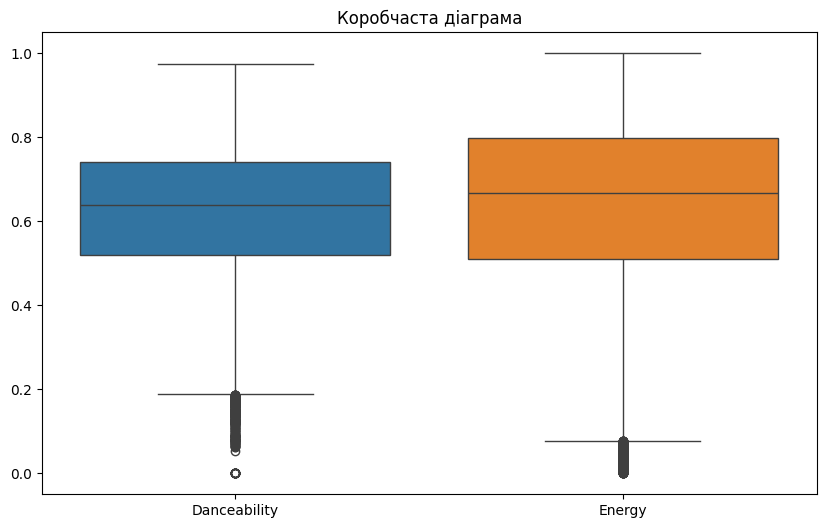

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Danceability', 'Energy']])
plt.title("Коробчаста діаграма")
plt.show()

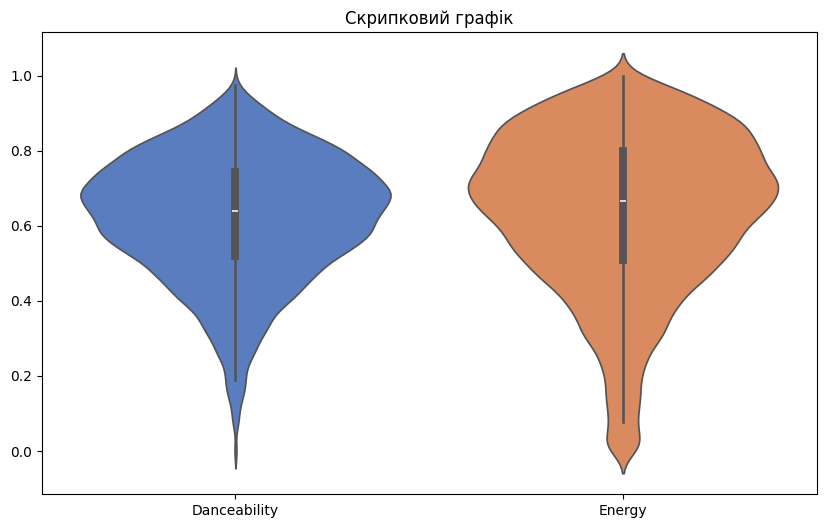

In [57]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['Danceability', 'Energy']], palette="muted")
plt.title("Скрипковий графік")
plt.show()

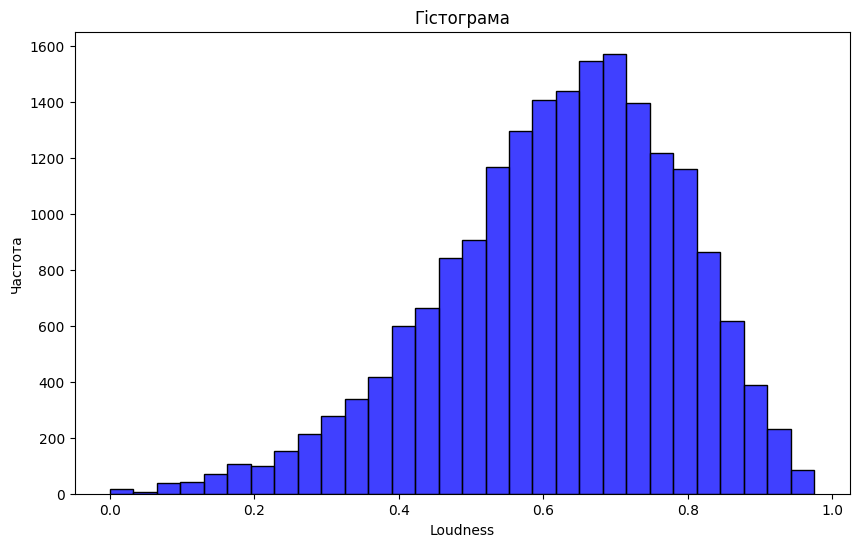

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Danceability'], bins=30, kde=False, color='blue', edgecolor='black')
plt.title("Гістограма")
plt.xlabel("Loudness")
plt.ylabel("Частота")
plt.show()


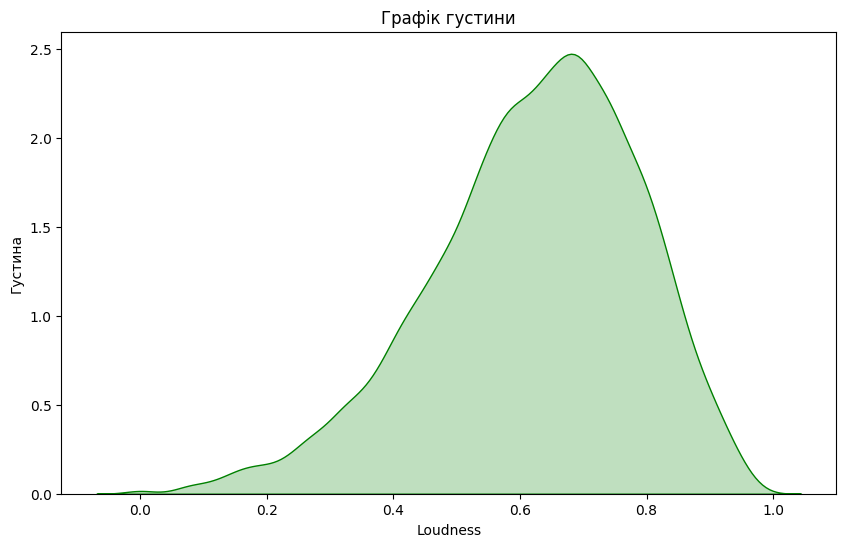

In [59]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Danceability'], fill=True, color='green')
plt.title("Графік густини")
plt.xlabel("Loudness")
plt.ylabel("Густина")
plt.show()

In [60]:
from scipy import stats

In [61]:
stat, p_value = stats.shapiro(df['Danceability'])

print(f"Статистика: {stat}, p-значення: {p_value}")

if p_value < 0.05:
    print("Дані не підкоряються нормальному розподілу.")
else:
    print("Дані можуть бути нормально розподіленими.")


Статистика: 0.979664320406348, p-значення: 3.2715214962421145e-45
Дані не підкоряються нормальному розподілу.


d:\University\third_course\thirdcourse2\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19170.
  res = hypotest_fun_out(*samples, **kwds)


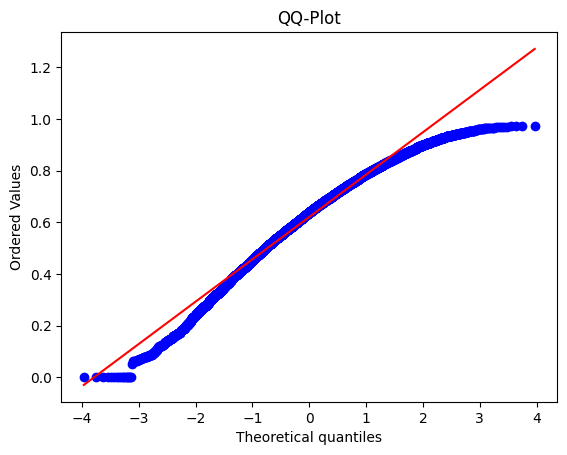

In [91]:
stats.probplot(df['Danceability'], dist="norm", plot=plt)
plt.title("QQ-Plot")
plt.show()

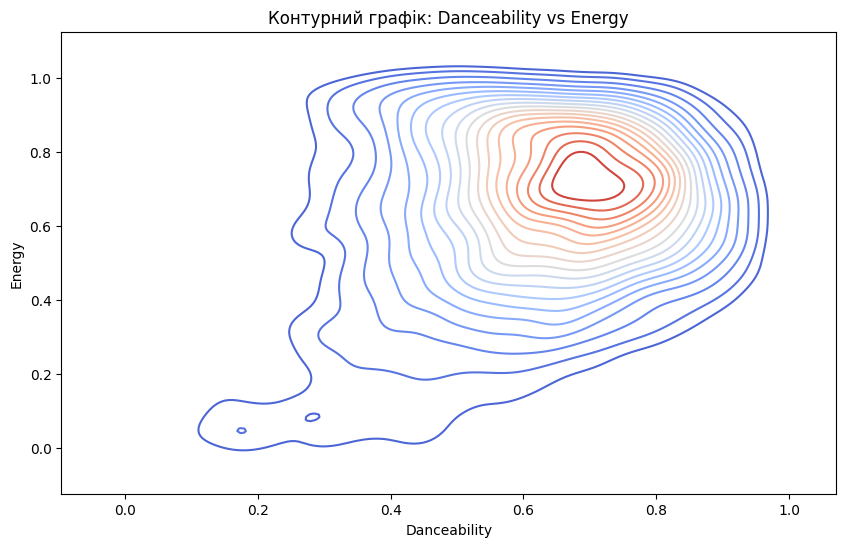

In [62]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=df['Danceability'], 
    y=df['Energy'], 
    cmap='coolwarm',  
    levels=20, 
    thresh=0
)
plt.title("Контурний графік: Danceability vs Energy")
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.show()

побудувати коефіцієнти кореляцій для 2 атрибутів. побудувати кореляційну матицю.


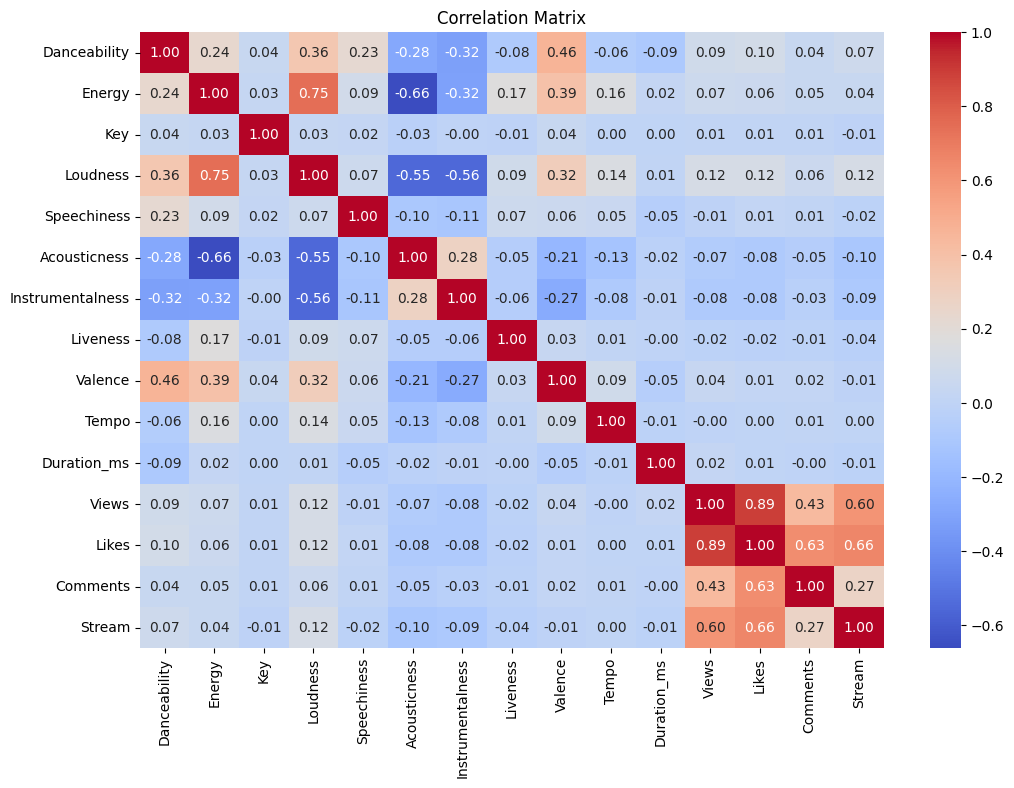

In [63]:
numeric_df = df.select_dtypes(include = ["number"])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [64]:
df['Danceability'].corr(df['Energy'])

np.float64(0.23730769332363522)

розрахувати моду та стандартну похибку

In [65]:
numeric_df.mode()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
0,0.687,0.572,0.0,-7.818,0.0324,0.114,0.0,0.11,0.961,77.986,237467.0,6.639000e+03,5730.0,0.0,169769959.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.333960e+05,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.020790e+06,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.877674e+06,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.266725e+06,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.309968e+07,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.588325e+07,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.870131e+07,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.934843e+07,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.029486e+08,NaN,NaN,NaN


In [66]:
numeric_df.std()

Danceability        1.655325e-01
Energy              2.134395e-01
Key                 3.579947e+00
Loudness            4.617605e+00
Speechiness         1.049305e-01
Acousticness        2.856304e-01
Instrumentalness    1.927683e-01
Liveness            1.652175e-01
Valence             2.449960e-01
Tempo               2.958831e+01
Duration_ms         1.278468e+05
Views               2.799997e+08
Likes               1.820550e+06
Comments            1.977979e+05
Stream              2.477309e+08
dtype: float64

95% довірчий інтервал для стовпця 'Energy': (0.6227716985425, 0.650759938)


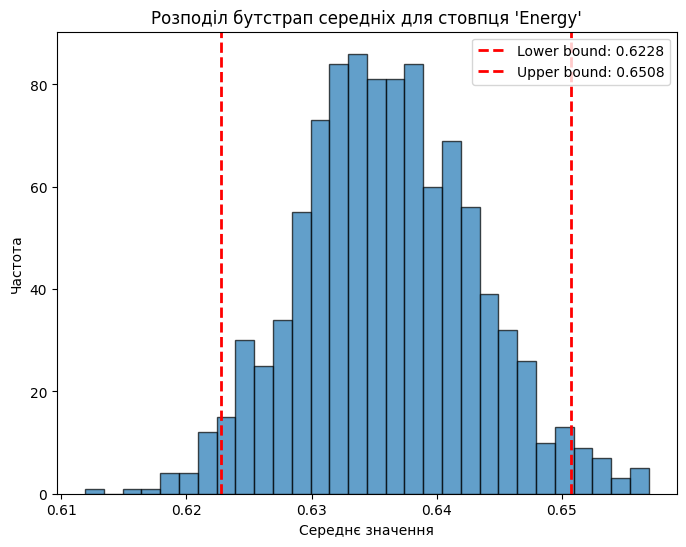

In [82]:
column = 'Energy'

data = df['Energy'].values

n_bootstrap = 1000  

bootstrap_samples = []

for _ in range(n_bootstrap):
    bootstrap_sample = np.random.choice(data, size=1000, replace=True)
    bootstrap_samples.append(np.mean(bootstrap_sample))  

bootstrap_samples = np.array(bootstrap_samples)

lower_bound = np.percentile(bootstrap_samples, 2.5)
upper_bound = np.percentile(bootstrap_samples, 97.5)


print(f"95% довірчий інтервал для стовпця '{column}': ({lower_bound}, {upper_bound})")

plt.figure(figsize=(8, 6))
plt.hist(bootstrap_samples, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=2, label=f'Lower bound: {lower_bound:.4f}')
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=2, label=f'Upper bound: {upper_bound:.4f}')
plt.title(f"Розподіл бутстрап середніх для стовпця '{column}'")
plt.xlabel("Середнє значення")
plt.ylabel("Частота")
plt.legend()
plt.show()